## Классификация с помощью kNN. Кластеризация K-means_7 урок. ДЗ

1. К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях `k`.

2. (\*) Напишите функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график ее зависимости от количества кластеров `k` (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке)

In [2]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Загрузим один из "игрушечных" датасетов из sklearn.

In [3]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделим выборку на обучающую и тестовую

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

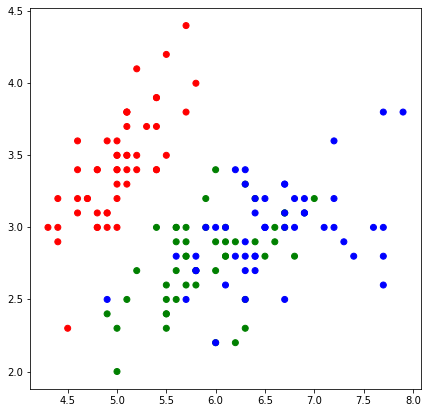

In [5]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [6]:
def e_metrics(x1, x2): # евклидова метрика
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

Реализуем алгоритм поиска k ближайших соседей.

In [7]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберем k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in k_neighbours:
            classes[d[1]] += 1 # вес каждого соседа равен 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

Функция для вычисления точности

In [8]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Проверка работы алгоритма для различных k

In [9]:
k = 1

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.667


График распределения классов.

In [10]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

<ipython-input-9-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


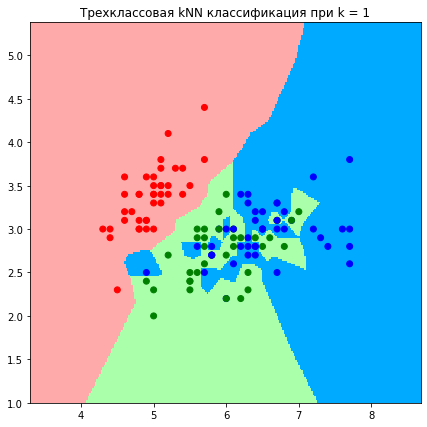

In [10]:
get_graph(X_train, y_train, k)

In [11]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.833


<ipython-input-10-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


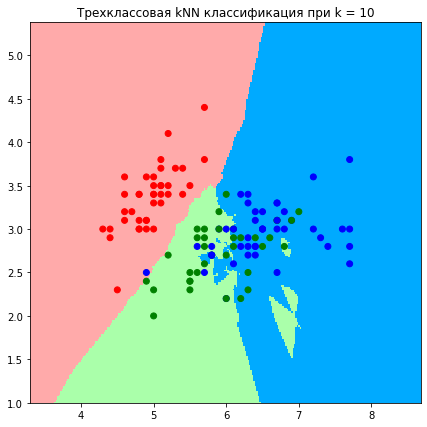

In [12]:
get_graph(X_train, y_train, k)

При увеличении k мы на графиках наблюдаем, как алгоритм меньше концентрируется на выбросах, однако, точность на тестовой выборке при этом увеличивается.

__**№1** К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях k.

In [24]:
# Реализуем функцию расчёта весов по дистанции между объектами

def calc_weight(distance):
    a = 0.1
    weight = 1 / (distance - a)
    return weight

In [25]:
# Реализуем функцию предсказания значения, с учётом весов
from itertools import combinations

def calc_prediction(weights):
    weighted_sum = 0
    weight_product = 1
    combination_sum = 0

    for value, weight in weights.items():
        weighted_sum += value/weight
        weight_product *= weight

    for x in list(combinations(weights.values(), len(weights.values())-1)):
        combination_sum += np.prod(x)

    prediction = (weight_product/combination_sum) * weighted_sum

    return prediction

In [26]:
def knn_w(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        

        # Сортируем список и среди первых k элементов подсчитаем веса этих элементов, основанные на дистанции до них
        weights = {}
        for d in sorted(test_distances)[:k]:
            weights[d[1]] = calc_weight(d[0])
            
        answers.append(calc_prediction(weights))
        
    return answers

In [27]:
k = 1

y_pred = knn_w(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.600


In [28]:
k = 5

y_pred = knn_w(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.400


In [29]:
k = 10

y_pred = knn_w(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.333


### Вывод: При увеличении k (добавив W) наблюдаем точность на тестовой выборке при этом уменьшается.

__**№ 2**(*) Напишите функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке)

In [30]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=200, random_state=1)

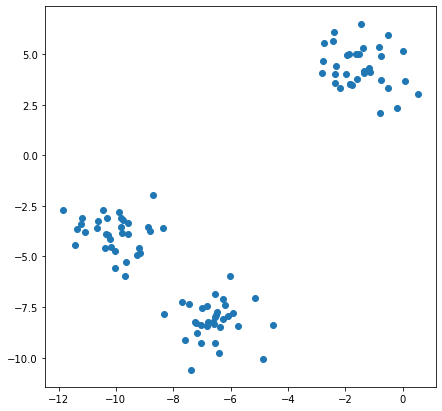

In [31]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1]);

In [32]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item], alpha=0.7)
            
    plt.show()

In [ ]:
# определим максимальное количество итераций
max_iterations = 1

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

In [33]:
# Реализуем функцию вычисления среднего квадратичного внутриклассового расстояния
def calc_inner_distance(centroids, clusters):
    distances = np.zeros(len(centroids))
    result = 0

    for i, centroid in enumerate(centroids):
        for x in clusters[i]:
            distances[i] += e_metrics(x, centroid)**2
        result += distances[i] / len(clusters[i])
    return result

In [40]:
def kmeans(data, k, max_iterations, min_distance):
       
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for i in range(max_iterations):
        # Создадим словарь для классификации
        classes = {i: [] for i in range(k)}
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
              
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        
        for ind in range(len(centroids)):
            distance = e_metrics(centroids[ind], old_centroids[ind])
            if distance > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            #print('stop:', i)
            break
    
    return old_centroids, classes

In [36]:
max_iterations = 100
min_distance = 1e-4
k = 5

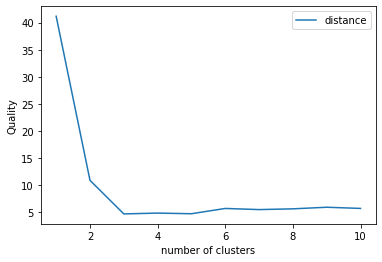

In [41]:
# Построим несколько моделей с разным количество кластеров
clusters_count_list = list(range(1,11))
cls = [kmeans(X, k, max_iterations, min_distance) for k in clusters_count_list]
Quality = [calc_inner_distance(centroids, clusters) for centroids, clusters in cls]
# Построим на графике зависимость среднеквадратичного внутрикластерного рассотояния от количества кластеров
plt.xlabel('number of clusters')
plt.ylabel('Quality')
plt.plot(clusters_count_list, Quality, label='distance')
plt.legend(loc='upper right')
plt.show()

### Вывод:k=3 !

In [44]:
# определим максимальное количество итераций
max_iterations = 20

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

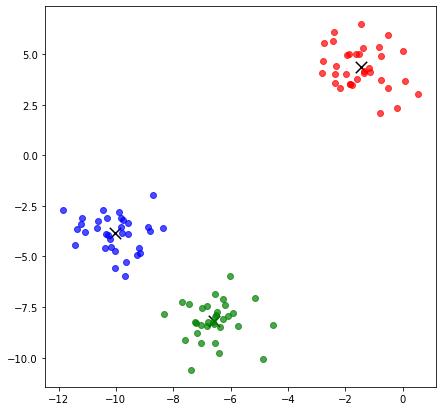

In [45]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)